In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diversity_metrics = pd.read_csv('all_diversity_imagenet.csv')

In [3]:
def ensure_unique_folders(df, threshold):
    """
    Ensures uniqueness of the "Folder" field in the dataframe.
    
    Args:
    - df (pd.DataFrame): The dataframe to process.
    - threshold (int): The maximum allowable value for "Count".
    
    Returns:
    - pd.DataFrame: A dataframe where the "Folder" field is unique, and 
                    the chosen row for each folder has the largest "Count" 
                    below the threshold.
    """

    # Filter rows where Count is less than the threshold
    df = df[df['Count'] <= threshold]

    # Sort by Folder and Count, then drop duplicates on Folder while keeping the last (highest Count)
    df = df.sort_values(by=['Folder', 'Count']).drop_duplicates(
        subset='Folder', keep='last')

    return df

In [4]:
diversity_metrics_extracted = ensure_unique_folders(diversity_metrics, 1000)
diversity_metrics_extracted

,Folder,Count,Vendi (clip-L-14-padding),Dissimilarity (clip-L-14-padding),Std (clip-L-14-padding),Vendi (clip-L-14-crop),Dissimilarity (clip-L-14-crop),Std (clip-L-14-crop),Vendi (convnextv2-l-resize),Dissimilarity (convnextv2-l-resize),...,Std (dinov2-l-fb-resize),Vendi (dinov2-l-fb-crop),Dissimilarity (dinov2-l-fb-crop),Std (dinov2-l-fb-crop),Vendi (dinov2-l-fb-padding),Dissimilarity (dinov2-l-fb-padding),Std (dinov2-l-fb-padding),Vendi (vgg19-gram-resize),Dissimilarity (vgg19-gram-resize),Std (vgg19-gram-resize)
403,.,1000,22.415264,0.513729,15.409961,22.906530,0.518935,15.680628,89.690392,0.971242,...,45.722183,165.409973,0.952143,45.765343,170.080597,0.949778,45.728855,9.957637,0.362259,19.341356
283,n01440764,1000,7.542769,0.308427,12.051901,8.049507,0.321043,12.399017,2.585499,0.152275,...,31.197685,11.403591,0.451804,31.402081,11.853292,0.459752,31.726892,3.768274,0.196686,16.487091
35,n01443537,1000,6.175024,0.274083,11.573570,6.194399,0.273017,11.724828,2.629423,0.135059,...,29.321367,8.720750,0.402751,29.358486,8.458376,0.399240,29.270384,4.945237,0.239929,19.511002
367,n01484850,1000,5.795485,0.271029,11.090736,5.696094,0.267001,11.223405,3.275364,0.198361,...,34.920174,14.822135,0.555023,35.074413,14.185005,0.547211,34.893734,6.245957,0.292323,10.649731
23,n01491361,1000,6.048075,0.278842,11.144013,6.219991,0.282997,11.414865,5.659393,0.286232,...,33.127296,10.951007,0.495145,33.178791,10.250183,0.478446,32.678673,5.050464,0.242152,7.963357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,n02028035,1000,4.976147,0.235743,10.217493,4.649883,0.222786,9.993406,1.839784,0.089910,...,24.676802,5.375418,0.258677,24.054569,6.213705,0.283260,25.225624,4.054381,0.206938,14.031037
139,n02037110,1000,5.319665,0.248649,10.540963,5.154633,0.243421,10.528826,1.670483,0.070988,...,23.853399,4.922199,0.243683,23.265234,5.755563,0.271612,24.583233,4.034952,0.207480,16.432562
67,n02051845,1000,6.882808,0.298530,11.784016,6.577238,0.290594,11.754025,3.733524,0.195161,...,23.278620,5.221995,0.245490,22.870464,5.667029,0.255765,23.413414,4.972130,0.241298,19.127432
47,n02058221,1000,7.017003,0.304444,11.616125,6.817814,0.298211,11.669671,3.079271,0.170899,...,28.375864,7.556125,0.349939,27.568272,9.042387,0.383295,28.883730,5.217921,0.257301,13.432553


In [5]:
diversity_metrics_extracted[diversity_metrics_extracted['Folder']=='.']

,Folder,Count,Vendi (clip-L-14-padding),Dissimilarity (clip-L-14-padding),Std (clip-L-14-padding),Vendi (clip-L-14-crop),Dissimilarity (clip-L-14-crop),Std (clip-L-14-crop),Vendi (convnextv2-l-resize),Dissimilarity (convnextv2-l-resize),...,Std (dinov2-l-fb-resize),Vendi (dinov2-l-fb-crop),Dissimilarity (dinov2-l-fb-crop),Std (dinov2-l-fb-crop),Vendi (dinov2-l-fb-padding),Dissimilarity (dinov2-l-fb-padding),Std (dinov2-l-fb-padding),Vendi (vgg19-gram-resize),Dissimilarity (vgg19-gram-resize),Std (vgg19-gram-resize)
403,.,1000,22.415264,0.513729,15.409961,22.90653,0.518935,15.680628,89.690392,0.971242,...,45.722183,165.409973,0.952143,45.765343,170.080597,0.949778,45.728855,9.957637,0.362259,19.341356


In [6]:
for row in diversity_metrics_extracted.head():
    print(row)

Folder
Count
Vendi (clip-L-14-padding)
Dissimilarity (clip-L-14-padding)
Std (clip-L-14-padding)
Vendi (clip-L-14-crop)
Dissimilarity (clip-L-14-crop)
Std (clip-L-14-crop)
Vendi (convnextv2-l-resize)
Dissimilarity (convnextv2-l-resize)
Std (convnextv2-l-resize)
Vendi (clip-L-14-resize)
Dissimilarity (clip-L-14-resize)
Std (clip-L-14-resize)
Vendi (dinov2-l-fb-resize)
Dissimilarity (dinov2-l-fb-resize)
Std (dinov2-l-fb-resize)
Vendi (dinov2-l-fb-crop)
Dissimilarity (dinov2-l-fb-crop)
Std (dinov2-l-fb-crop)
Vendi (dinov2-l-fb-padding)
Dissimilarity (dinov2-l-fb-padding)
Std (dinov2-l-fb-padding)
Vendi (vgg19-gram-resize)
Dissimilarity (vgg19-gram-resize)
Std (vgg19-gram-resize)


In [7]:
diversity_metrics_extracted.head()

,Folder,Count,Vendi (clip-L-14-padding),Dissimilarity (clip-L-14-padding),Std (clip-L-14-padding),Vendi (clip-L-14-crop),Dissimilarity (clip-L-14-crop),Std (clip-L-14-crop),Vendi (convnextv2-l-resize),Dissimilarity (convnextv2-l-resize),...,Std (dinov2-l-fb-resize),Vendi (dinov2-l-fb-crop),Dissimilarity (dinov2-l-fb-crop),Std (dinov2-l-fb-crop),Vendi (dinov2-l-fb-padding),Dissimilarity (dinov2-l-fb-padding),Std (dinov2-l-fb-padding),Vendi (vgg19-gram-resize),Dissimilarity (vgg19-gram-resize),Std (vgg19-gram-resize)
403,.,1000,22.415264,0.513729,15.409961,22.906530,0.518935,15.680628,89.690392,0.971242,...,45.722183,165.409973,0.952143,45.765343,170.080597,0.949778,45.728855,9.957637,0.362259,19.341356
283,n01440764,1000,7.542769,0.308427,12.051901,8.049507,0.321043,12.399017,2.585499,0.152275,...,31.197685,11.403591,0.451804,31.402081,11.853292,0.459752,31.726892,3.768274,0.196686,16.487091
35,n01443537,1000,6.175024,0.274083,11.573570,6.194399,0.273017,11.724828,2.629423,0.135059,...,29.321367,8.720750,0.402751,29.358486,8.458376,0.399240,29.270384,4.945237,0.239929,19.511002
367,n01484850,1000,5.795485,0.271029,11.090736,5.696094,0.267001,11.223405,3.275364,0.198361,...,34.920174,14.822135,0.555023,35.074413,14.185005,0.547211,34.893734,6.245957,0.292323,10.649731
23,n01491361,1000,6.048075,0.278842,11.144013,6.219991,0.282997,11.414865,5.659393,0.286232,...,33.127296,10.951007,0.495145,33.178791,10.250183,0.478446,32.678673,5.050464,0.242152,7.963357


In [23]:
metrics_avg = {}

for col in diversity_metrics_extracted.columns:
    if col not in 'Folder':
        metrics_avg[col] = {}

In [24]:
metrics_avg

{'Count': {},
 'Vendi (clip-L-14-padding)': {},
 'Dissimilarity (clip-L-14-padding)': {},
 'Std (clip-L-14-padding)': {},
 'Vendi (clip-L-14-crop)': {},
 'Dissimilarity (clip-L-14-crop)': {},
 'Std (clip-L-14-crop)': {},
 'Vendi (convnextv2-l-resize)': {},
 'Dissimilarity (convnextv2-l-resize)': {},
 'Std (convnextv2-l-resize)': {},
 'Vendi (clip-L-14-resize)': {},
 'Dissimilarity (clip-L-14-resize)': {},
 'Std (clip-L-14-resize)': {},
 'Vendi (dinov2-l-fb-resize)': {},
 'Dissimilarity (dinov2-l-fb-resize)': {},
 'Std (dinov2-l-fb-resize)': {},
 'Vendi (dinov2-l-fb-crop)': {},
 'Dissimilarity (dinov2-l-fb-crop)': {},
 'Std (dinov2-l-fb-crop)': {},
 'Vendi (dinov2-l-fb-padding)': {},
 'Dissimilarity (dinov2-l-fb-padding)': {},
 'Std (dinov2-l-fb-padding)': {},
 'Vendi (vgg19-gram-resize)': {},
 'Dissimilarity (vgg19-gram-resize)': {},
 'Std (vgg19-gram-resize)': {}}

In [25]:
import os
from tqdm import tqdm

common_ref = diversity_metrics_extracted[diversity_metrics_extracted['Folder'] == "."].iloc[0]
print(common_ref)

for index, row in tqdm(diversity_metrics_extracted.iterrows()):
    folder_path = row['Folder']
    if folder_path == '.':
        continue  # Skip the root directory

    parts = folder_path.split(os.path.sep)

    if len(parts) == 2:
        types = ['all_artists', parts[0]]
        reference_rows = [common_ref,
                          diversity_metrics_extracted[
            diversity_metrics_extracted['Folder'] == parts[0]].iloc[0]]
    else:
        types = ['all_classes']
        reference_rows = [common_ref]

    for col in diversity_metrics_extracted.columns[1:]:
        for type_, reference_row in zip(types, reference_rows):
            if reference_row[col] == 0:  # Check to avoid division by zero
                ratio = 0
            else:
                ratio = row[col] / reference_row[col]
            # Storing the ratio and the name of the row
            if type_ not in metrics_avg[col]:
                metrics_avg[col][type_] = []
            metrics_avg[col][type_].append((folder_path, ratio))

Folder                                          .
Count                                        1000
Vendi (clip-L-14-padding)               22.415264
Dissimilarity (clip-L-14-padding)        0.513729
Std (clip-L-14-padding)                 15.409961
Vendi (clip-L-14-crop)                   22.90653
Dissimilarity (clip-L-14-crop)           0.518935
Std (clip-L-14-crop)                    15.680628
Vendi (convnextv2-l-resize)             89.690392
Dissimilarity (convnextv2-l-resize)      0.971242
Std (convnextv2-l-resize)               16.883362
Vendi (clip-L-14-resize)                22.897184
Dissimilarity (clip-L-14-resize)         0.519758
Std (clip-L-14-resize)                   15.66783
Vendi (dinov2-l-fb-resize)               164.9478
Dissimilarity (dinov2-l-fb-resize)       0.953099
Std (dinov2-l-fb-resize)                45.722183
Vendi (dinov2-l-fb-crop)               165.409973
Dissimilarity (dinov2-l-fb-crop)         0.952143
Std (dinov2-l-fb-crop)                  45.765343


101it [00:00, 2606.36it/s]


In [14]:
sorted(metrics_avg['Std (vgg19-gram-resize)']['all_classes'], key=lambda x: x[1])

[('n01491361', 0.4117269160187412),
 ('n01601694', 0.4947085141563369),
 ('n01496331', 0.5210243321764803),
 ('n01795545', 0.5274480173002337),
 ('n01494475', 0.5413811391437512),
 ('n02018795', 0.5417011449502048),
 ('n01484850', 0.55061964267629),
 ('n01798484', 0.5686053989170687),
 ('n01665541', 0.587434757521887),
 ('n01632777', 0.5965770127748882),
 ('n01955084', 0.6088812606867887),
 ('n01796340', 0.6210585910415533),
 ('n01930112', 0.6487734113338858),
 ('n01695060', 0.6511196603776896),
 ('n01498041', 0.6559800998792854),
 ('n01776313', 0.6650862127199398),
 ('n01675722', 0.6741409471244889),
 ('n01685808', 0.6803113395166936),
 ('n01664065', 0.6819907536565717),
 ('n02018207', 0.6829722198472433),
 ('n01753488', 0.6852485015198057),
 ('n01910747', 0.6866329087659995),
 ('n01770081', 0.6910726071972609),
 ('n02058221', 0.6944990360872866),
 ('n01774384', 0.6980729930779146),
 ('n01773549', 0.7158801081728102),
 ('n01667114', 0.7172315779954738),
 ('n01622779', 0.71822339876539

In [16]:
sorted(metrics_avg['Std (clip-L-14-padding)']['all_classes'], key=lambda x: x[1])

[('n01773157', 0.5933826839904534),
 ('n01592084', 0.6261282054693763),
 ('n02007558', 0.6290853460234433),
 ('n01735189', 0.6341419369292289),
 ('n01773797', 0.643945003609552),
 ('n01860187', 0.6479981607220712),
 ('n01695060', 0.6486016815282841),
 ('n01531178', 0.6506761295824524),
 ('n01622779', 0.6520050264519976),
 ('n01632458', 0.6564228210327496),
 ('n02018207', 0.6607947574390346),
 ('n01774384', 0.6614547190753606),
 ('n02028035', 0.6630447166710555),
 ('n01806143', 0.663239598440822),
 ('n02027492', 0.6642137597421546),
 ('n01843383', 0.6663347467264163),
 ('n01537544', 0.6674327436648726),
 ('n01820546', 0.6740985789845169),
 ('n01770081', 0.678468720671423),
 ('n01698640', 0.6801397281866559),
 ('n01755581', 0.6802826249813178),
 ('n01729977', 0.6833885415831839),
 ('n02037110', 0.6840356926363592),
 ('n01950731', 0.6894628621503894),
 ('n01774750', 0.6926641464268221),
 ('n01614925', 0.6961624877038516),
 ('n02013706', 0.7014903287833071),
 ('n01819313', 0.70169913509997

In [17]:
sorted(metrics_avg['Vendi (clip-L-14-padding)']['all_classes'], key=lambda x: x[1])

[('n01773157', 0.15496186879331902),
 ('n02007558', 0.17062002523133402),
 ('n01773797', 0.17833758039232972),
 ('n01592084', 0.18761920256663217),
 ('n01695060', 0.19130579216194887),
 ('n01860187', 0.19280148814836964),
 ('n01531178', 0.1950499461626027),
 ('n01735189', 0.19525629307013054),
 ('n01806143', 0.1962089563237201),
 ('n01774384', 0.19751323896231246),
 ('n01622779', 0.20294046045057315),
 ('n01843383', 0.20610501364272152),
 ('n01820546', 0.21004100644874504),
 ('n01729977', 0.2100561740100922),
 ('n01698640', 0.21014154206575292),
 ('n01632458', 0.21099694572540256),
 ('n02018207', 0.212273318349286),
 ('n01537544', 0.21358900324998506),
 ('n01755581', 0.21903147739110115),
 ('n01774750', 0.22165646532937988),
 ('n02028035', 0.2219981290079164),
 ('n02027492', 0.22202431591958308),
 ('n01770081', 0.2245069670374217),
 ('n01614925', 0.2259056161586732),
 ('n01818515', 0.2295584882438423),
 ('n01910747', 0.22984382134391146),
 ('n01819313', 0.23149091639640185),
 ('n018470

In [18]:
sorted(metrics_avg['Vendi (vgg19-gram-resize)']['all_classes'], key=lambda x: x[1])

[('n02027492', 0.3756485399047),
 ('n01440764', 0.3784305585710798),
 ('n02037110', 0.40521182197034306),
 ('n02028035', 0.4071630084991973),
 ('n01820546', 0.4164202982012173),
 ('n01798484', 0.4179271451678755),
 ('n01773157', 0.4182514330776924),
 ('n01560419', 0.4215503873593224),
 ('n01531178', 0.42526681683259204),
 ('n01860187', 0.4273819191197604),
 ('n01592084', 0.4278968434987122),
 ('n01695060', 0.4334152449221312),
 ('n01847000', 0.43392083141826926),
 ('n02007558', 0.43754541443391504),
 ('n01828970', 0.4401418726084844),
 ('n01601694', 0.4440194404185134),
 ('n01818515', 0.4520446563414903),
 ('n01622779', 0.4521108355930212),
 ('n01514668', 0.46437238557238686),
 ('n02002556', 0.46833274927669716),
 ('n01729977', 0.46931207769424976),
 ('n01877812', 0.4708296033679205),
 ('n02018795', 0.4757394142647796),
 ('n02018207', 0.4779874975805307),
 ('n01984695', 0.48547801196762214),
 ('n01833805', 0.49135206700979633),
 ('n01735189', 0.49386199413695886),
 ('n01978287', 0.4941

In [19]:
sorted(metrics_avg['Std (clip-L-14-resize)']['all_classes'], key=lambda x: x[1])

[('n01773157', 0.5932370076141991),
 ('n01592084', 0.622432004166314),
 ('n02007558', 0.6263306192358095),
 ('n01735189', 0.6272096793268891),
 ('n01860187', 0.6392054226844373),
 ('n01695060', 0.6397958452632679),
 ('n01773797', 0.6420126690077024),
 ('n01531178', 0.6447065785431548),
 ('n01622779', 0.6491463128627334),
 ('n02028035', 0.6499497745163999),
 ('n01632458', 0.6501043191481165),
 ('n01774384', 0.6526259105061802),
 ('n02027492', 0.659345710741266),
 ('n01537544', 0.6605228429321944),
 ('n02018207', 0.661004067768095),
 ('n01843383', 0.6644280317788562),
 ('n01820546', 0.6644437966703941),
 ('n01806143', 0.6668139476804033),
 ('n01770081', 0.6686638572696633),
 ('n01729977', 0.6747491662715805),
 ('n01774750', 0.6760735997656814),
 ('n01819313', 0.6778493108885916),
 ('n01698640', 0.6796177786829573),
 ('n01755581', 0.6825705002601817),
 ('n02037110', 0.6856179329232474),
 ('n01614925', 0.68694169686597),
 ('n01775062', 0.6931189778799095),
 ('n01818515', 0.6948204905364695

In [29]:
# Convert the nested dictionary structure to a flat dataframe
df_list = []

for metric, categories in metrics_avg.items():
    for category, values in categories.items():
        labels, value_list = zip(*values)
        temp_df = pd.DataFrame({
            'Metric': [metric] * len(labels),
            'Category': category,
            'Value': value_list
        })
        df_list.append(temp_df)

full_df = pd.concat(df_list, ignore_index=True)


In [30]:
full_df[full_df['Metric']=='Std (clip-L-14-resize)']

,Metric,Category,Value
1200,Std (clip-L-14-resize),all_classes,0.787660
1201,Std (clip-L-14-resize),all_classes,0.744866
1202,Std (clip-L-14-resize),all_classes,0.713519
1203,Std (clip-L-14-resize),all_classes,0.730948
1204,Std (clip-L-14-resize),all_classes,0.742885
...,...,...,...
1295,Std (clip-L-14-resize),all_classes,0.649950
1296,Std (clip-L-14-resize),all_classes,0.685618
1297,Std (clip-L-14-resize),all_classes,0.761454
1298,Std (clip-L-14-resize),all_classes,0.753381


In [31]:
full_df

,Metric,Category,Value
0,Count,all_classes,1.000000
1,Count,all_classes,1.000000
2,Count,all_classes,1.000000
3,Count,all_classes,1.000000
4,Count,all_classes,1.000000
...,...,...,...
2495,Std (vgg19-gram-resize),all_classes,0.725442
2496,Std (vgg19-gram-resize),all_classes,0.849608
2497,Std (vgg19-gram-resize),all_classes,0.988940
2498,Std (vgg19-gram-resize),all_classes,0.694499


In [36]:
# Remove rows with Metric equal to 'count'
full_df = full_df[full_df['Metric'] != 'Count']

# Sort the dataframe by Metric
full_df = full_df.sort_values(by='Metric')

In [32]:
len(diversity_metrics.columns)-1

25

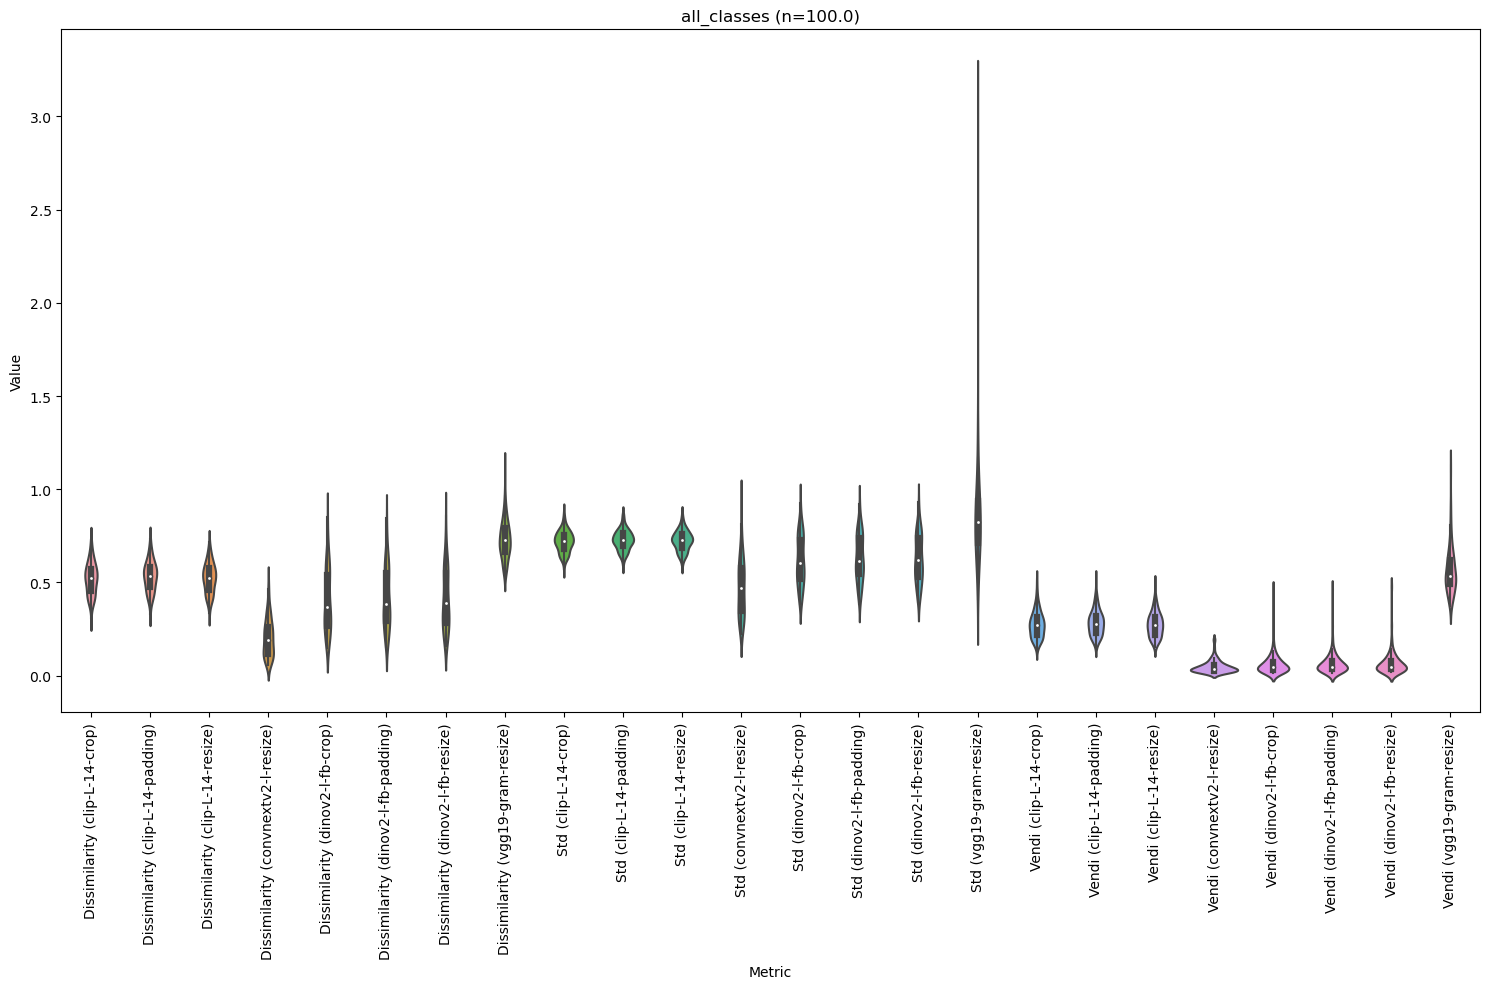

In [41]:
categories = full_df['Category'].unique()

for category in categories:
    plt.figure(figsize=(15, 10))

    filtered_df = full_df[full_df['Category'] == category]
    count_values = filtered_df.shape[0]/(len(diversity_metrics.columns)-2)

    sns.violinplot(x='Metric', y='Value', data=filtered_df)
    plt.title(f"{category} (n={count_values})")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'figures/imagenet/{category}.png')

In [82]:
metrics_avg['Vendi (clip-L-14)']['Minimalism']

[('Minimalism/agnes-martin', 0.24825222260596153),
 ('Minimalism/brice-marden', 0.29154747523839586)]